In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Traning Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\srsin\OneDrive\Desktop\Plant Disease Detection\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


# Validation preprcessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\srsin\OneDrive\Desktop\Plant Disease Detection\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 95.25  84.25  90.25]
   [ 79.75  68.75  74.75]
   [108.75  97.75 103.75]
   ...
   [ 92.5   77.5   82.5 ]
   [ 91.25  76.25  81.25]
   [ 91.75  76.75  81.75]]

  [[109.    98.   104.  ]
   [102.    91.    97.  ]
   [100.75  89.75  95.75]
   ...
   [106.25  91.25  96.25]
   [ 98.    83.    88.  ]
   [ 97.5   82.5   87.5 ]]

  [[111.75 100.75 106.75]
   [110.25  99.25 105.25]
   [111.75 100.75 106.75]
   ...
   [104.    89.    94.  ]
   [ 92.    77.    82.  ]
   [ 91.    76.    81.  ]]

  ...

  [[160.   153.   161.  ]
   [167.75 160.75 168.75]
   [162.   155.   163.  ]
   ...
   [162.   152.   160.  ]
   [157.75 147.75 155.75]
   [160.25 150.25 158.25]]

  [[159.75 152.75 160.75]
   [161.25 154.25 162.25]
   [165.75 158.75 166.75]
   ...
   [157.   147.   155.  ]
   [162.25 152.25 160.25]
   [166.25 156.25 164.25]]

  [[164.25 157.25 165.25]
   [148.75 141.75 149.75]
   [156.5  149.5  157.5 ]
   ...
   [165.75 155.75 163.75]
   [161.75 151.75 159.75]
   [163.   153.   16

# Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

### building CNN

In [8]:
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128,128,3]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

C:\Users\srsin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [10]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [11]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [12]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units = 1500, activation = 'relu'))

In [16]:
model.add(Dropout(0.40))

In [17]:
model.add(Dense(units = 38, activation = 'softmax'))

## Compiling Model

In [18]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [20]:
training_history = model.fit(x = training_set, validation_data = validation_set, epochs = 10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1436s 652ms/step - accuracy: 0.3838 - loss: 2.1918 - val_accuracy: 0.7930 - val_loss: 0.6519
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1539s 701ms/step - accuracy: 0.8316 - loss: 0.5343 - val_accuracy: 0.9080 - val_loss: 0.2933
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1574s 716ms/step - accuracy: 0.9071 - loss: 0.2921 - val_accuracy: 0.9199 - val_loss: 0.2509
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1439s 655ms/step - accuracy: 0.9335 - loss: 0.2052 - val_accuracy: 0.9412 - val_loss: 0.1821
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2494s 1s/step - accuracy: 0.9509 - loss: 0.1520 - val_accuracy: 0.9410 - val_loss: 0.1898
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1495s 680ms/step - accuracy: 0.9629 - loss: 0.1107 - val_accuracy: 0.9532 - val_loss: 0.1522
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3279s 1s/step - accuracy: 0.9689 - loss: 0.0954 - val_accuracy: 0.9549 - val_loss: 0.1474
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1809s 823ms/step - 

In [21]:
model.save("trined_model.keras")

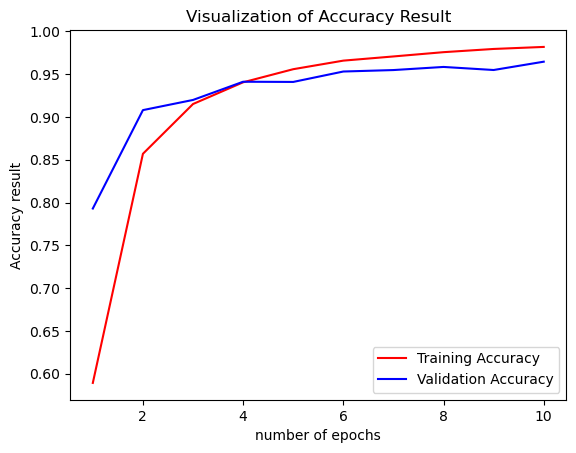

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color = 'red', label = 'Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color = 'blue', label = 'Validation Accuracy')
plt.xlabel('number of epochs')
plt.ylabel('Accuracy result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [24]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [25]:
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [26]:
test_set = validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\srsin\OneDrive\Desktop\Plant Disease Detection\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 98s 179ms/step


(array([[9.5072219e-06, 2.0717821e-06, 1.0333631e-07, ..., 3.2186803e-10,
         9.8263897e-10, 3.3919290e-10],
        [3.8205887e-15, 7.0329116e-13, 4.5386795e-19, ..., 3.2007875e-19,
         7.7557960e-20, 8.4477255e-20],
        [4.6389823e-18, 1.7387608e-16, 3.2195604e-19, ..., 1.1195485e-17,
         1.5368072e-22, 5.6144743e-18],
        ...,
        [2.3024402e-06, 5.3166835e-09, 4.5385221e-08, ..., 1.8559093e-07,
         8.9613096e-08, 2.2563088e-07],
        [1.3348570e-07, 1.1561521e-12, 5.7180516e-10, ..., 3.4388149e-14,
         2.1491254e-14, 4.1022524e-13],
        [9.1874587e-13, 1.0529014e-12, 3.7310315e-15, ..., 1.5807241e-13,
         2.8056075e-15, 3.5919772e-13]], dtype=float32),
 (17572, 38))

In [34]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([18, 27, 24, ..., 21, 26, 27], dtype=int64)>

In [35]:
y_true = tf.concat([y for x,y in test_set],axis=0)
y_true

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_true,predicted_categories,target_names=class_names))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets